In [6]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import cv2

In [2]:
os.getcwd()

'/common/home/projectgrps/CS701/CS701G6/DL_CV_yolo'

### Preprocess pipeline

In [2]:
def preprocess_image(in_path: str, out_path: str):
    noisy_image = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)

    # Non-Local Means Denoising
    # Bilateral Filtering for Edge Preservation
    denoised_image_NLMD = cv2.fastNlMeansDenoising(noisy_image, None, h=10, templateWindowSize=7, searchWindowSize=9)
    denoised_image_BFandNLMD = cv2.bilateralFilter(denoised_image_NLMD, d=9, sigmaColor=75, sigmaSpace=75)
    # denoised_image_BF = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)
    print(in_path, out_path)
    cv2.imwrite(out_path, denoised_image_BFandNLMD)

In [3]:
from joblib import Parallel, delayed
import os

old_path = './data/private_leaderboard_data/test2_images'
new_path = './data/private_leaderboard_data/test2_images_clean'


def process_sample(folder):
    os.makedirs(os.path.join(new_path, folder), exist_ok=True)
    for file in os.listdir(os.path.join(old_path, folder)):
        in_path = os.path.join(old_path, folder, file)
        out_path = os.path.join(new_path, folder, file)
        preprocess_image(in_path, out_path)

Parallel(n_jobs=-1)(delayed(process_sample)(folder) for folder in os.listdir(old_path))


./data/private_leaderboard_data/test2_images/73/31.png ./data/private_leaderboard_data/test2_images_clean/73/31.png
./data/private_leaderboard_data/test2_images/69/31.png ./data/private_leaderboard_data/test2_images_clean/69/31.png
./data/private_leaderboard_data/test2_images/74/31.png ./data/private_leaderboard_data/test2_images_clean/74/31.png
./data/private_leaderboard_data/test2_images/77/31.png ./data/private_leaderboard_data/test2_images_clean/77/31.png
./data/private_leaderboard_data/test2_images/69/35.png./data/private_leaderboard_data/test2_images/73/35.png ./data/private_leaderboard_data/test2_images_clean/73/35.png
 ./data/private_leaderboard_data/test2_images_clean/69/35.png
./data/private_leaderboard_data/test2_images/74/35.png ./data/private_leaderboard_data/test2_images_clean/74/35.png
./data/private_leaderboard_data/test2_images/70/31.png ./data/private_leaderboard_data/test2_images_clean/70/31.png
./data/private_leaderboard_data/test2_images/77/35.png ./data/private_le

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Scraps

In [3]:
path = './data/Public_leaderboard_data/test1_images/51/10.png'
img = Image.open(path).convert('RGB')
img.show()

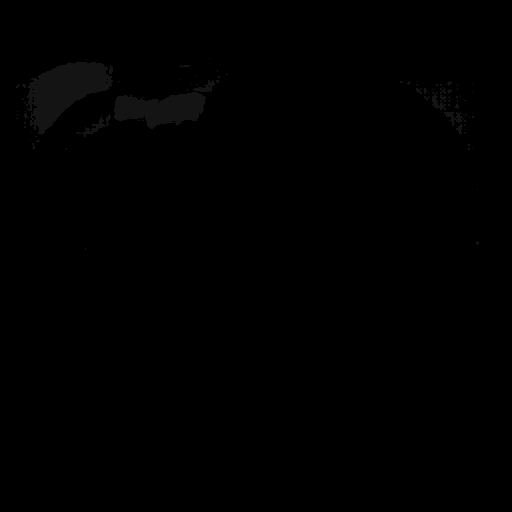

In [13]:
mask_path = './temp/val/51/10.png'

img = Image.open(mask_path)
arr = np.array(img)
# print(np.unique(arr))
arr = (arr > 0) * 20
mask_img = Image.fromarray(np.uint8(arr))
mask_img.show()

In [5]:
bbox_path = './data/Public_leaderboard_data/test1_bbox.txt'
        
bbox_dict = {}
with open(bbox_path) as f:
    for line in f:
        idx, box = line.split(':')
        ct, slice, organ = [part.strip() for part in idx.strip()[1:-1].split(',')]
        slice = int(slice)
        organ = int(organ)
        if (ct, slice) not in bbox_dict:
            bbox_dict[(ct, slice)] = {}

        x0, y0, x1, y1 = [int(part.strip()) for part in box.strip()[1:-1].split(',')]
        bbox_dict[(ct, slice)][int(organ)] = np.array([y0, x0, y1, x1])



4 [164 286 276 399]
9 [183 231 236 288]
11 [209 244 243 315]
8 [129 102 263 184]


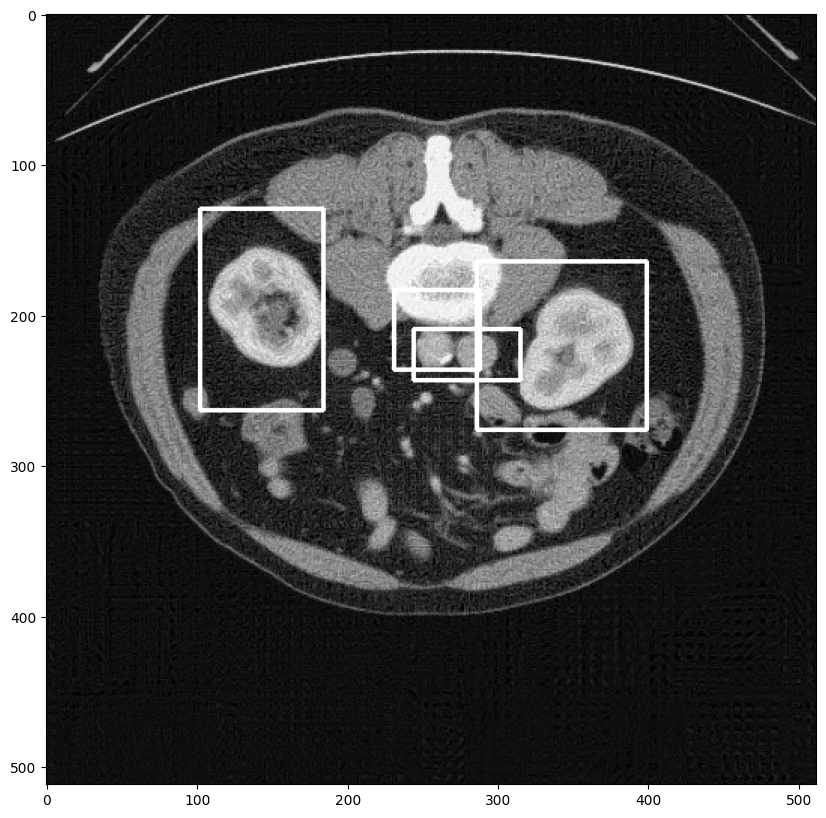

In [11]:
path = './data/Public_leaderboard_data/test1_images/51/10.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for k, v in bbox_dict[('51', 10)].items():
    x1, y1, x2, y2 = v
    img = cv2.rectangle(img, (y1, x1), (y2, x2), (255, 0, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

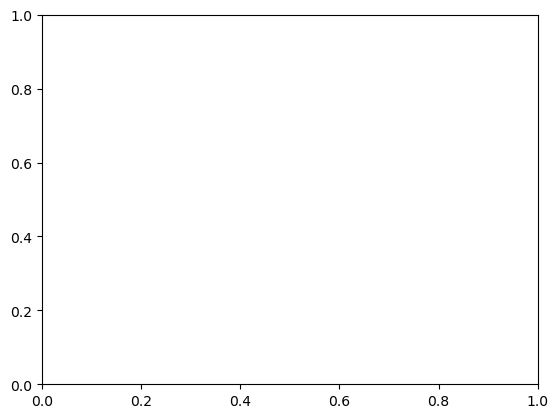

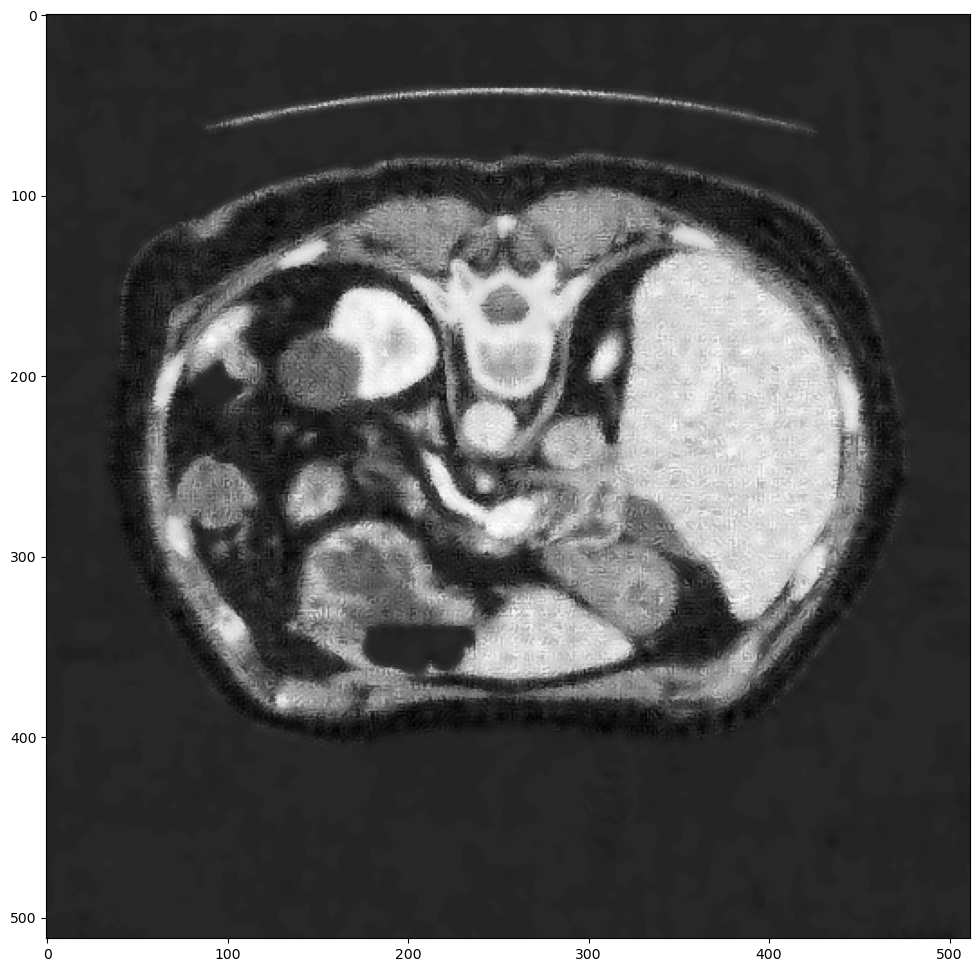

In [4]:
# noisy image
image_path = "data/Public_leaderboard_data/test1_images/52/56.png"  
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 
 
if noisy_image is None:
    print("no image.")
else:
    # Non-Local Means Denoising
    # Bilateral Filtering for Edge Preservation
    denoised_image_NLMD = cv2.fastNlMeansDenoising(noisy_image, None, h=10, templateWindowSize=7, searchWindowSize=9)
    denoised_image_BFandNLMD = cv2.bilateralFilter(denoised_image_NLMD, d=9, sigmaColor=75, sigmaSpace=75)
    # denoised_image_BF = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)

# cv2.imwrite('D:\\Documents\\Python\\Medical-SAM2\\vis\\clean.png', denoised_image_BF)
plt.cla()
plt.figure(figsize=(12,12))
plt.imshow(denoised_image_BFandNLMD, cmap='gray')
plt.show()

### Load network

In [2]:
import torch
import torch.optim as optim
import torchvision

import cfg
from func_3d.utils import get_network

ModuleNotFoundError: No module named 'cfg'

In [34]:
default_args = cfg.parse_args()
default_args.sam_ckpt = './checkpoints/sam2_hiera_tiny.pt'
default_args.sam_config = 'sam2_hiera_t'

GPUdevice = torch.device('cuda', 0)

net = get_network(default_args,'sam2', use_gpu=True, gpu_device=GPUdevice, distribution=None)
net.to(dtype=torch.bfloat16)

pretrain = './checkpoints/MedSAM2_pretrain.pth'
print(pretrain)
weights = torch.load(pretrain)
net.load_state_dict(weights, strict=False)

torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

./checkpoints/MedSAM2_pretrain.pth


### Predict

In [ ]:
frame = '01'
slice = 42
img_path = f'./data/Public_leaderboard_data/train_images_clean/{frame}/{slice}.png'
img_path = f'./vis/clean.png'
mask_path = f'./data/Public_leaderboard_data/train_labels/{frame}/{slice}.png'
# bbox_path = './data/Public_leaderboard_data/test1_bbox.txt'
bbox_path = None

In [ ]:
newsize = (1024, 1024)

"""Get the images"""
name = frame

img_tensor = torch.zeros(1, 3, 1024, 1024)
img = Image.open(img_path).convert('RGB')

if mask_path is not None:
    mask = np.asarray(Image.open(mask_path).convert('L'))
    # mask = np.rot90(mask)
    obj_list = np.unique(mask[mask > 0])

    diff_obj_mask_dict = {}

if bbox_path is not None:
    bboxes = load_bbox(bbox_path)
    obj_list = list(bboxes[(frame, slice)].keys())
    
diff_obj_bbox_dict = {}   
    
for obj in obj_list:
    if mask_path is not None:
        obj_mask = mask == obj

        # if self.transform_msk:
        obj_mask = Image.fromarray(obj_mask)
        obj_mask = obj_mask.resize(newsize)
        obj_mask = torch.tensor(np.array(obj_mask)).unsqueeze(0).int()
        # obj_mask = self.transform_msk(obj_mask).int()
        diff_obj_mask_dict[obj] = obj_mask
        
    if bbox_path is None:
        diff_obj_bbox_dict[obj] = generate_bbox(np.array(obj_mask.squeeze(0)), variation=0.2)
    else:
        diff_obj_bbox_dict[obj] = bboxes[(frame, slice)][obj] * 2

    # if self.transform:
    # state = torch.get_rng_state()
    # img = self.transform(img)
    # torch.set_rng_state(state)

img_tensor[0, :, :, :] = torch.tensor(np.array(img.resize(newsize))).permute(2, 0, 1)
if mask_path is not None:
    mask_dict = {0: diff_obj_mask_dict}
bbox_dict = {0: diff_obj_bbox_dict}


image_meta_dict = {'filename_or_obj': name}


if len(img_tensor.size()) == 5:
    img_tensor = img_tensor.squeeze(0)
frame_id = list(range(img_tensor.size(0)))

train_state = net.val_init_state(imgs_tensor=img_tensor)
object_ids = torch.tensor(obj_list, dtype=torch.uint8).to(device=GPUdevice)

with torch.no_grad():
    for ann_obj_id in obj_list:
        bbox = bbox_dict[0][ann_obj_id]
        _, _, _ = net.train_add_new_bbox(
            inference_state=train_state,
            frame_idx=0,
            obj_id=ann_obj_id,
            bbox=torch.from_numpy(bbox).to(device=GPUdevice),
            clear_old_points=False,
        )
video_segments = {}  # video_segments contains the per-frame segmentation results

for out_frame_idx, out_obj_ids, out_mask_logits in net.propagate_in_video(train_state, start_frame_idx=0):
    video_segments[out_frame_idx] = {
        out_obj_id: torch.nn.functional.interpolate(
            torch.sigmoid(out_mask_logits[i].unsqueeze(0)),
            size=512,
            mode="bilinear",
            align_corners=False,
        )
        for i, out_obj_id in enumerate(out_obj_ids)
    }
    
    
# Stack tensors along a new dimension
stacked_tensors = torch.stack([video_segments[0][ann_obj_id].squeeze(0).squeeze(0)
                               for ann_obj_id in obj_list])

# Find best predictions
max_values, max_indices = torch.max(stacked_tensors, dim=0)

# Apply mask and set result on GPU
result = torch.zeros(max_values.shape, dtype=torch.uint8).to(device=GPUdevice)
mask = max_values >= 0.7
print(max_values.max())
result[mask] = object_ids[max_indices][mask]

# save image
torchvision.io.write_png(result.unsqueeze(0).cpu(), './vis/tmp.png', compression_level=0)

NameError: name 'torch' is not defined

### Visualize

In [42]:
def generate_bbox(mask, variation=0, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # check if all masks are black
    if len(mask.shape) != 2:
        current_shape = mask.shape
        raise ValueError(f"Mask shape is not 2D, but {current_shape}")
    max_label = max(set(mask.flatten()))
    if max_label == 0:
        return np.array([np.nan, np.nan, np.nan, np.nan])
    # max agreement position
    indices = np.argwhere(mask == max_label) 
    # return point_labels, indices[np.random.randint(len(indices))]
    # print(indices)
    x0 = np.min(indices[:, 0])
    x1 = np.max(indices[:, 0])
    y0 = np.min(indices[:, 1])
    y1 = np.max(indices[:, 1])
    w = x1 - x0
    h = y1 - y0
    mid_x = (x0 + x1) / 2
    mid_y = (y0 + y1) / 2
    if variation > 0:
        num_rand = np.random.randn(2) * variation
        w *= 1 + num_rand[0]
        h *= 1 + num_rand[1]
        x1 = mid_x + w / 2
        x0 = mid_x - w / 2
        y1 = mid_y + h / 2
        y0 = mid_y - h / 2
    return np.array([y0, x0, y1, x1])


def load_bbox(bbox_path):
    bbox_dict = {}
    with open(bbox_path) as f:
        for line in f:
            idx, box = line.split(':')
            ct, slice, organ = [part.strip() for part in idx.strip()[1:-1].split(',')]
            ct = f"{ct:02}"
            slice = int(slice)
            organ = int(organ)
            if (ct, slice) not in bbox_dict:
                bbox_dict[(ct, slice)] = {}

            x0, y0, x1, y1 = [int(part.strip()) for part in box.strip()[1:-1].split(',')]
            bbox_dict[(ct, slice)][int(organ)] = np.array([x0, y0, x1, y1])
    return bbox_dict

# gr = [0, 255, 127]
# colors = np.array([[r, g, b] for r in gr for g in gr for b in gr
#                    if r != g or r != g or g != b])

colors = np.array([
    (4, 42, 255),
    (11, 219, 235),
    (243, 243, 243),
    (0, 223, 183),
    (17, 31, 104),
    (255, 111, 221),
    (255, 68, 79),
    (204, 237, 0),
    (0, 243, 68),
    (189, 0, 255),
    (0, 180, 255),
    (221, 0, 186),
    (0, 255, 255),
    (38, 192, 0)
])
# colors = np.fliplr(colors)

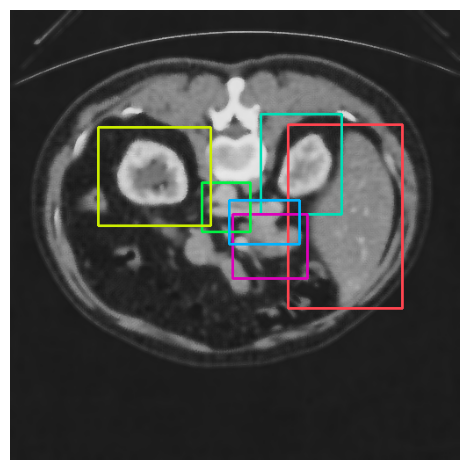

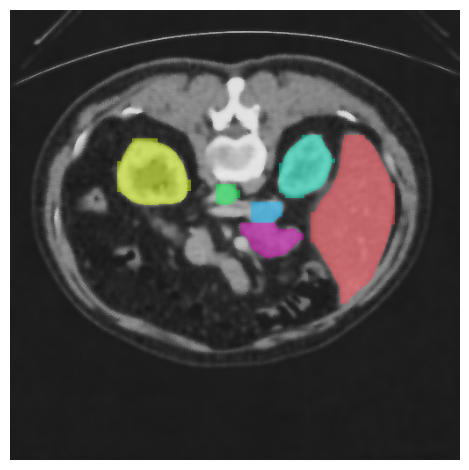

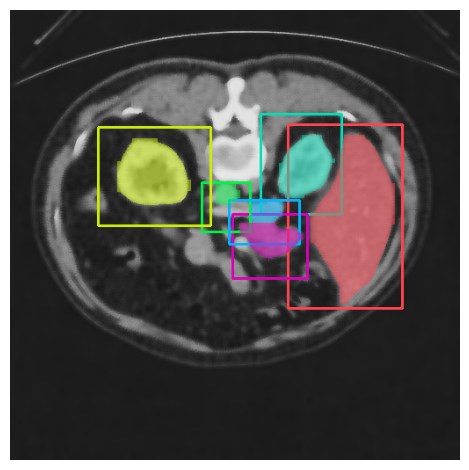

In [53]:
import cv2

frame = '51'
slice = 23
img_path = f'data/Public_leaderboard_data/test1_images_clean/{frame}/{slice}.png'
label_path = f'data/Public_leaderboard_data/test_labels/{frame}/{slice}.png'
bbox_path = 'data/Public_leaderboard_data/test1_bbox.txt'

clear_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
clear_img = cv2.cvtColor(clear_img, cv2.COLOR_GRAY2BGR)

highlight = clear_img.copy()
mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
for obj in range(1, 15):
    highlight[mask == obj] = 0.5 * clear_img[mask == obj] + 0.5 * colors[obj-1]

if bbox_path is not None:
    bbox_dict = load_bbox(bbox_path)
    for obj, bbox in bbox_dict[(frame, slice)].items():
        x1, y1, x2, y2 = bbox
        clear_img = cv2.rectangle(clear_img, (x1, y1), (x2, y2), tuple(colors[obj-1].astype(float)), 2)

# Display the image
plt.clf()
plt.axis('off')
plt.tight_layout()
plt.imshow(clear_img, cmap='gray')
plt.show()
plt.clf()
plt.axis('off')
plt.tight_layout()
plt.imshow(highlight, cmap='gray')
plt.show()

if label_path is not None:
    highlight1 = clear_img.copy()
    mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    for obj in range(1, 15):
        highlight1[mask == obj] = 0.5 * clear_img[mask == obj] + 0.5 * colors[obj-1]
    plt.clf()
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(highlight1, cmap='gray')
    plt.show()